In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
data = pd.read_csv('/kaggle/input/concrete/Concrete.csv')
data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
data.shape

(1030, 9)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
data.isnull().mean()*100

cement              0.0
slag                0.0
flyash              0.0
water               0.0
superplasticizer    0.0
coarseaggregate     0.0
fineaggregate       0.0
age                 0.0
csMPa               0.0
dtype: float64

### Histplot

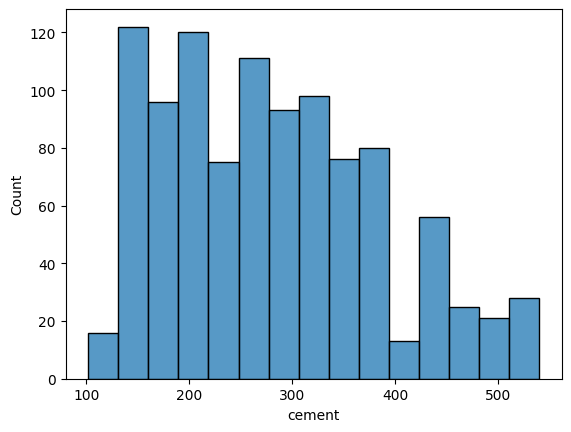

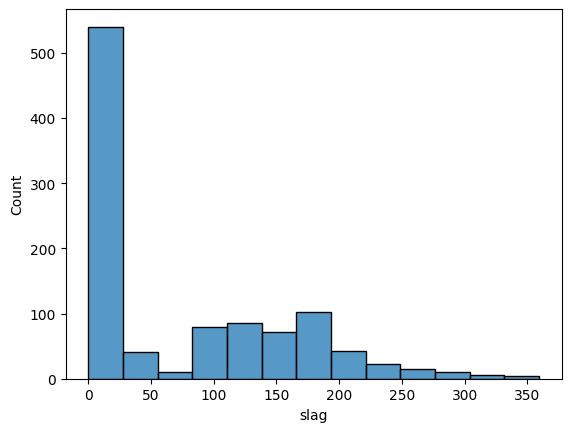

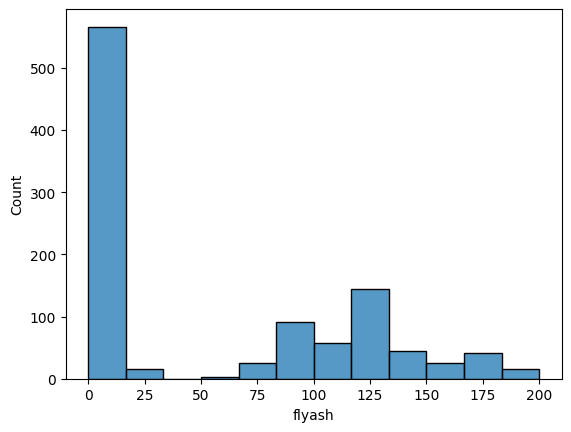

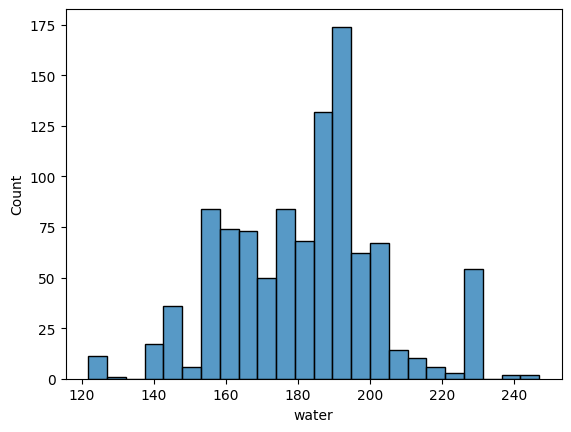

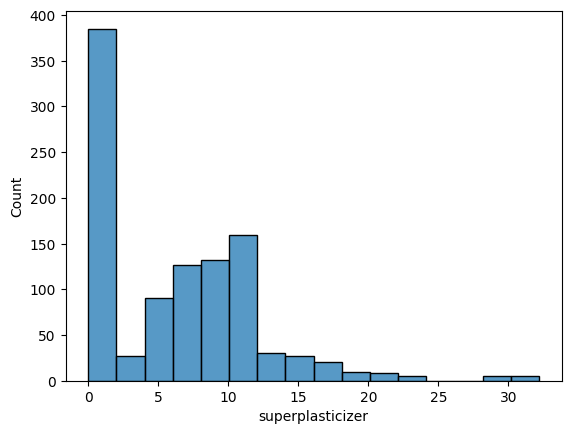

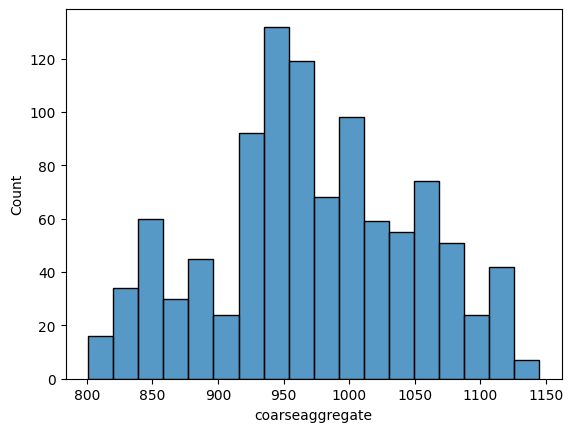

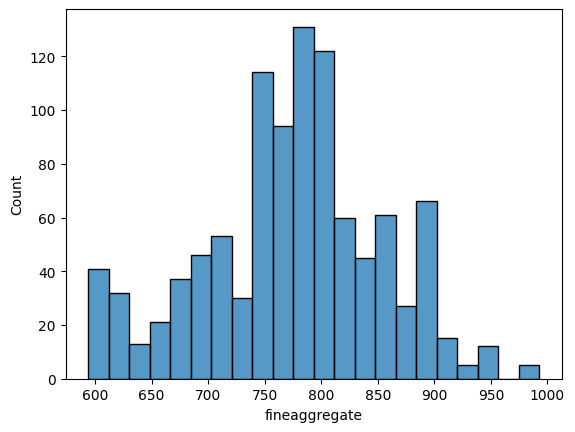

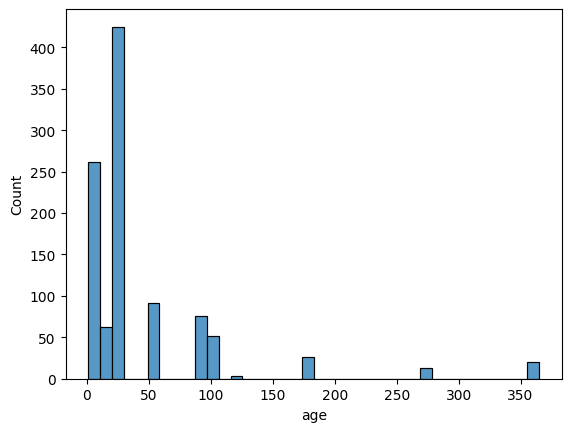

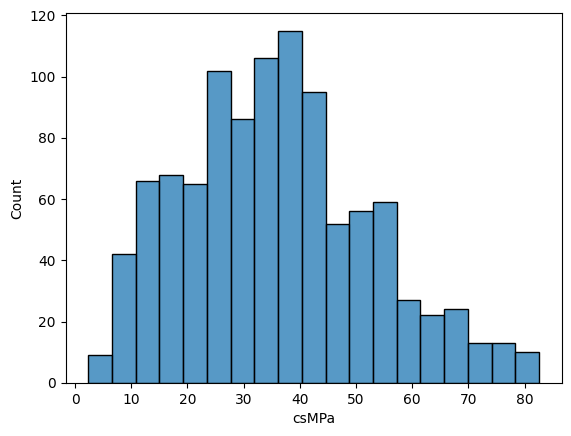

In [7]:
for i in data.columns:
    sns.histplot(x=data[i])
    plt.show();

In [8]:
### Finding outliers

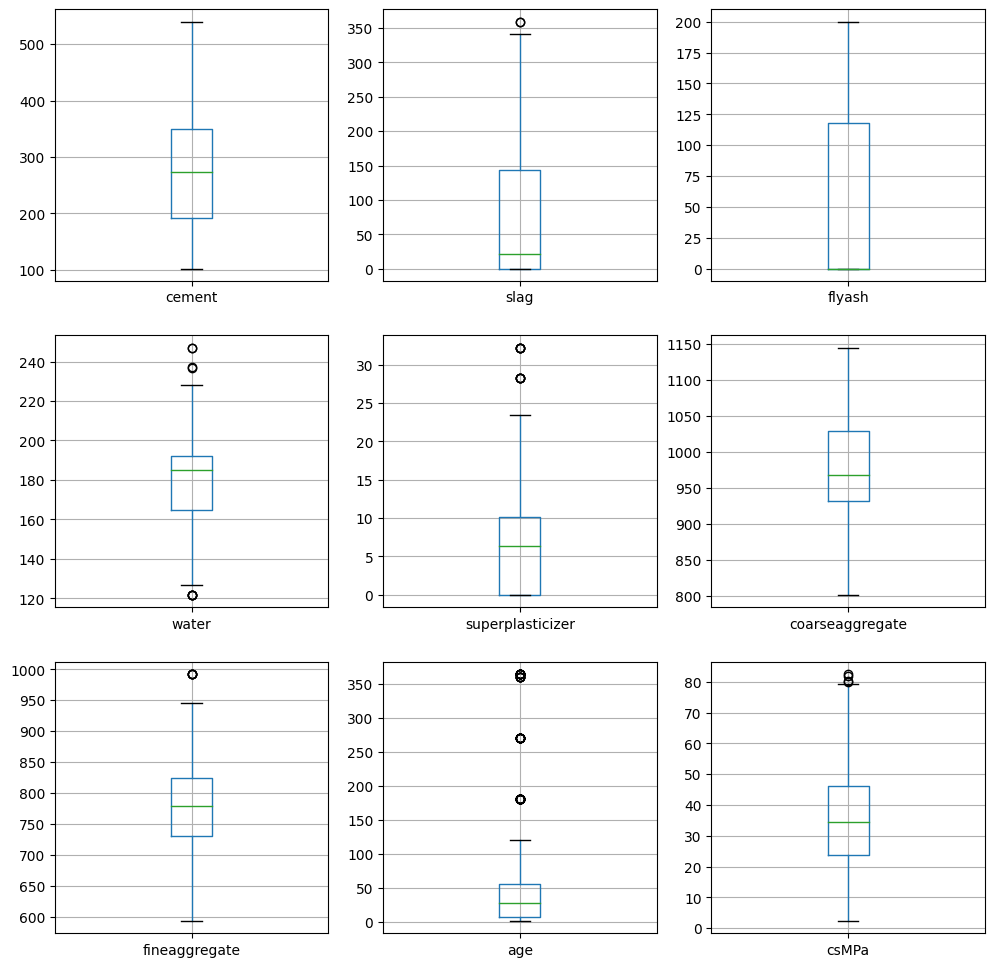

In [9]:
plt.figure(figsize=(12,12))
i=1
for col in data.columns:
    plt.subplot(3,3,i)
    data[[col]].boxplot()
    i+=1

### Corelation

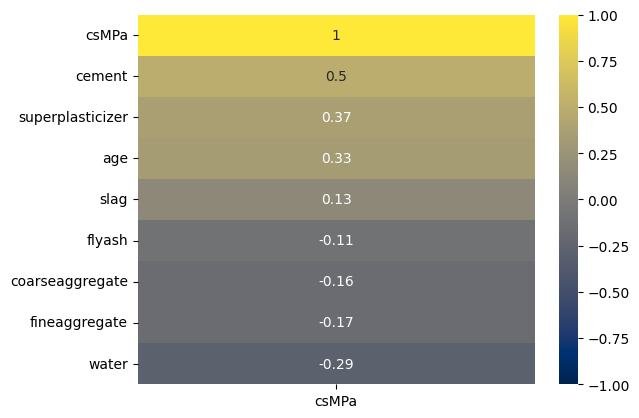

In [10]:
sns.heatmap(data.corr()[["csMPa"]].sort_values(by="csMPa", ascending=False),
vmin=-1, vmax=1,annot=True, cmap="cividis");

### Splitting the data into x & y

In [11]:
x = data.iloc[:,:-1].values

In [12]:
data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [13]:
y =data.iloc[:,-1].values

 ### Scaling the data

In [14]:
#sc = StandardScaler()

In [15]:
#x = sc.fit_transform(x)

### Splitting the data into training and testing data

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42,shuffle=True)

In [17]:
x_train.shape

(206, 8)

In [18]:
y_train.shape

(206,)

### Model building

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

### Predicting

In [21]:
y_pred = model.predict(x_test)

### Visualizing the results

In [22]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,52.91,64.051694
1,55.90,50.639700
2,74.50,65.700427
3,35.30,50.126339
4,10.54,18.294061


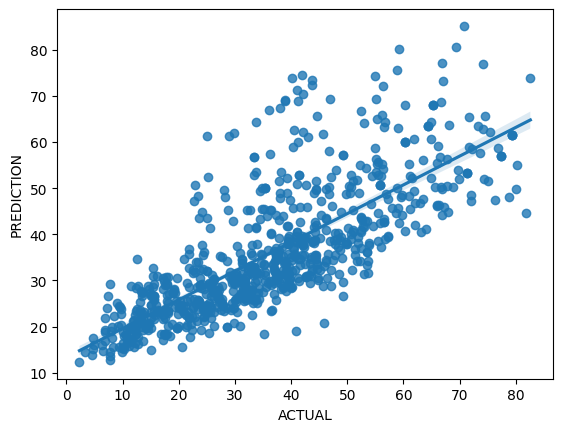

In [23]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()

### Evaluating the model

In [24]:
r2_score(y_test,y_pred)

0.589864148769285

In [25]:
model.score(x_train, y_train)

0.5906067053741209

In [26]:
model.score(x_test, y_test)

0.589864148769285

In [27]:
mean_squared_error(y_test, y_pred)

118.74135687811074

## Lets choose the other models

### RandomForestRegressor

In [28]:
RFR = RandomForestRegressor()

In [29]:
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
y_pred_RFR = RFR.predict(x_test)

In [31]:
OUTPUT_RFR = pd.DataFrame(zip(y_test, y_pred_RFR),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_RFR.head()

,ACTUAL,PREDICTION
0,52.91,49.523600
1,55.90,40.549450
2,74.50,69.073800
3,35.30,32.797363
4,10.54,17.326800


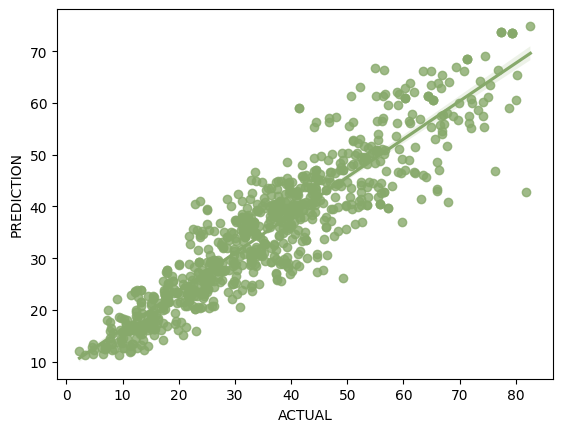

In [32]:
sns.regplot(data=OUTPUT_RFR, x='ACTUAL', y='PREDICTION', color = '#87a96b')
plt.show()

In [33]:
r2_score(y_test, y_pred_RFR)

0.8226013923426034

In [34]:
RFR.score(x_train, y_train)

0.9738104034745665

In [35]:
RFR.score(x_test, y_test)

0.8226013923426034

In [36]:
mean_squared_error(y_test, y_pred_RFR)

51.35993675831415

In [37]:
mean_squared_error(y_test, y_pred_RFR) 

51.35993675831415

### ADA Booster

In [38]:
ADA = AdaBoostRegressor()

In [39]:
ADA.fit(x_train, y_train)

AdaBoostRegressor()

In [40]:
y_pred_ADA = ADA.predict(x_test)

In [41]:
OUTPUT_ADA = pd.DataFrame(zip(y_test, y_pred_ADA),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_ADA.head()

,ACTUAL,PREDICTION
0,52.91,42.880882
1,55.90,51.204510
2,74.50,66.658000
3,35.30,34.751667
4,10.54,19.755000


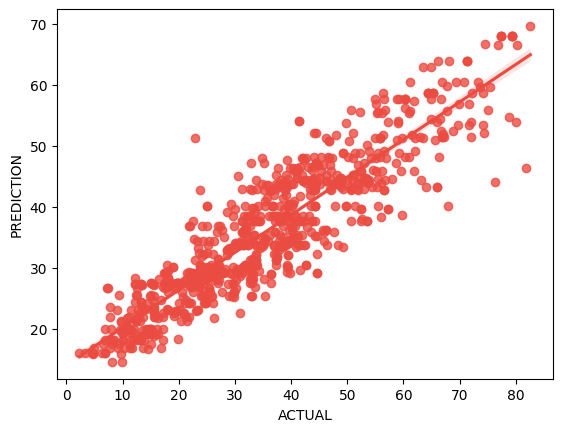

In [42]:
sns.regplot(data=OUTPUT_ADA, x='ACTUAL', y='PREDICTION', color = '#eb4c42')
plt.show()

### GradientBoostingRegressor

In [43]:
GBR = GradientBoostingRegressor()

In [44]:
GBR.fit(x_train, y_train)

GradientBoostingRegressor()

In [45]:
y_pred_GBR = GBR.predict(x_test)

In [46]:
OUTPUT_GBR = pd.DataFrame(zip(y_test, y_pred_GBR),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_GBR.head()

,ACTUAL,PREDICTION
0,52.91,51.577688
1,55.90,46.526400
2,74.50,70.909709
3,35.30,34.843323
4,10.54,12.135950


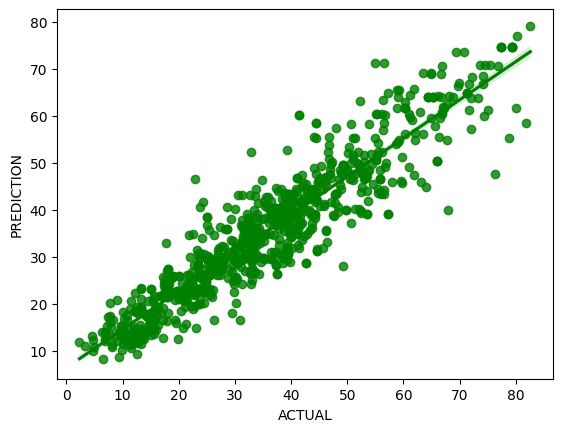

In [47]:
sns.regplot(data=OUTPUT_GBR, x='ACTUAL', y='PREDICTION', color = 'green')
plt.show()

### DecisionTreeRegressor

In [48]:
DTR = DecisionTreeRegressor()

In [49]:
DTR.fit(x_train, y_train)

DecisionTreeRegressor()

In [50]:
y_pred_DTR = DTR.predict(x_test)

In [51]:
OUTPUT_DTR = pd.DataFrame(zip(y_test, y_pred_DTR),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_DTR.head()

,ACTUAL,PREDICTION
0,52.91,53.69
1,55.90,35.30
2,74.50,71.30
3,35.30,35.30
4,10.54,15.42


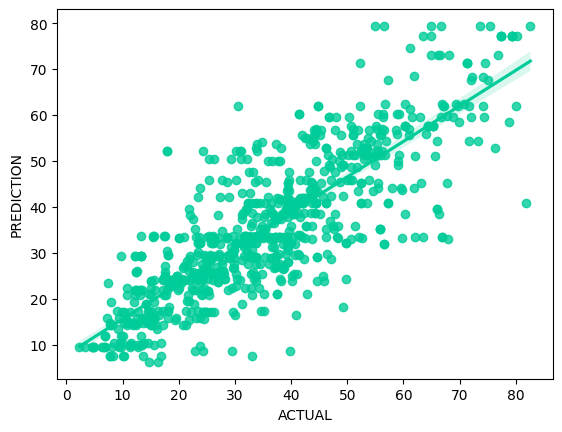

In [52]:
sns.regplot(data=OUTPUT_DTR, x='ACTUAL', y='PREDICTION', color = '#00cc99')
plt.show()

In [53]:
lasso_reg = Lasso()

In [54]:
lasso_reg.fit(x_train, y_train)

Lasso()

In [55]:
y_pred_lasso_reg = lasso_reg.predict(x_test)

In [56]:
OUTPUT_lasso_reg = pd.DataFrame(zip(y_test, y_pred_lasso_reg),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_lasso_reg.head()

,ACTUAL,PREDICTION
0,52.91,63.881344
1,55.90,50.308249
2,74.50,64.767430
3,35.30,49.796956
4,10.54,18.383033


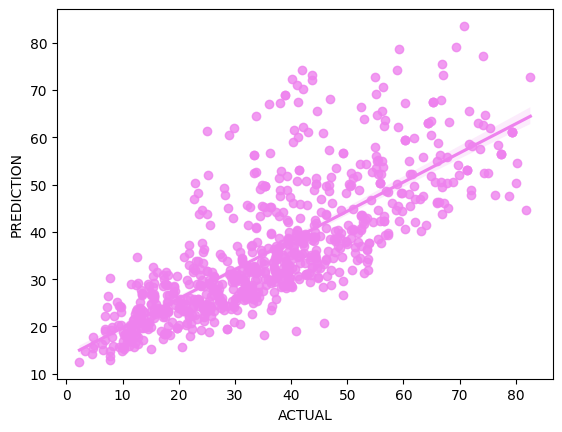

In [57]:
sns.regplot(data=OUTPUT_lasso_reg, x='ACTUAL', y='PREDICTION', color = 'violet')
plt.show()

In [58]:
ENG = ElasticNet()

In [59]:
ENG.fit(x_train, y_train)

ElasticNet()

In [60]:
y_pred_ENG = ENG.predict(x_test)

In [61]:
OUTPUT_ENG = pd.DataFrame(zip(y_test, y_pred_ENG),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_ENG.head()

,ACTUAL,PREDICTION
0,52.91,63.924347
1,55.90,50.374562
2,74.50,64.927113
3,35.30,49.862138
4,10.54,18.359927


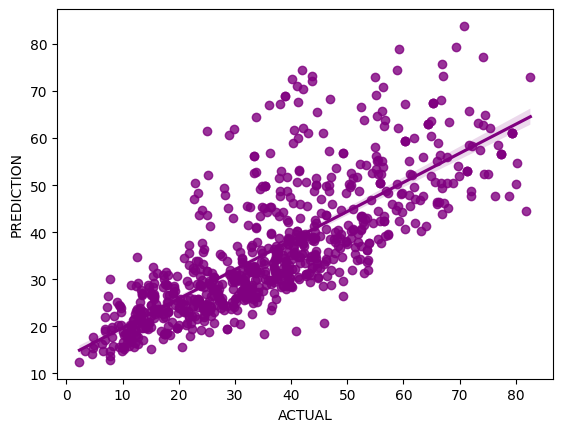

In [62]:
sns.regplot(data=OUTPUT_ENG, x='ACTUAL', y='PREDICTION', color = 'purple')
plt.show()

In [63]:
svr = SVR()

In [64]:
svr.fit(x_train, y_train)

SVR()

In [65]:
y_pred_svr = svr.predict(x_test)

In [66]:
OUTPUT_svr = pd.DataFrame(zip(y_test, y_pred_svr),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_svr.head()

,ACTUAL,PREDICTION
0,52.91,36.788742
1,55.90,34.667574
2,74.50,35.236106
3,35.30,34.628576
4,10.54,32.512159


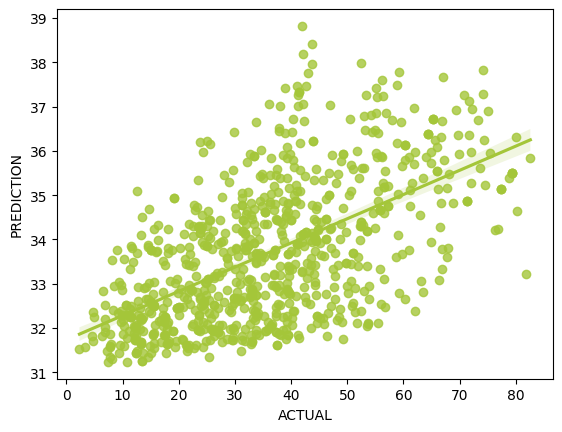

In [67]:
sns.regplot(data=OUTPUT_svr, x='ACTUAL', y='PREDICTION', color = '#a4c639')
plt.show()

In [68]:
knn_reg = KNeighborsRegressor()

In [69]:
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [70]:
y_pred_knn_reg = knn_reg.predict(x_test)

In [71]:
OUTPUT_knn_reg = pd.DataFrame(zip(y_test, y_pred_knn_reg),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_knn_reg.head()

,ACTUAL,PREDICTION
0,52.91,47.210
1,55.90,58.738
2,74.50,62.640
3,35.30,58.738
4,10.54,18.112


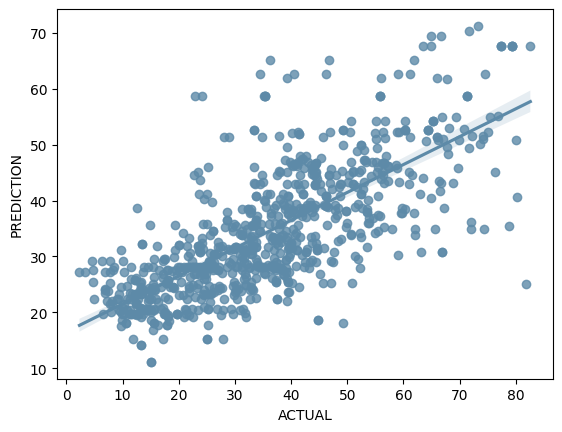

In [72]:
sns.regplot(data=OUTPUT_knn_reg, x='ACTUAL', y='PREDICTION', color = '#5d8aa8')
plt.show()

In [73]:
mlp_reg = MLPRegressor()

In [74]:
mlp_reg.fit(x_train, y_train)

MLPRegressor()

In [75]:
y_pred_mlp_reg = mlp_reg.predict(x_test)

In [76]:
OUTPUT_mlp_reg = pd.DataFrame(zip(y_test, y_pred_mlp_reg),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_mlp_reg.head()

,ACTUAL,PREDICTION
0,52.91,49.516727
1,55.90,46.495554
2,74.50,60.709071
3,35.30,45.641524
4,10.54,15.976488


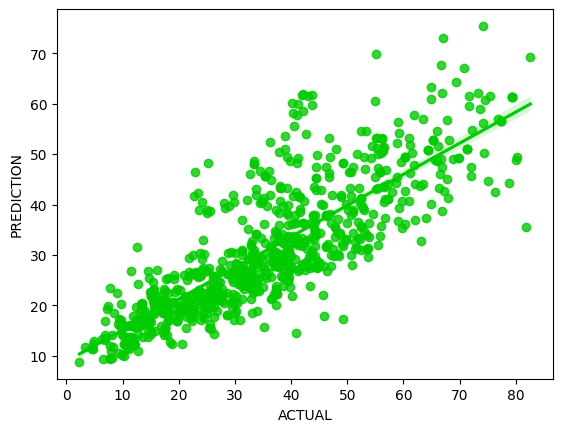

In [77]:
sns.regplot(data=OUTPUT_mlp_reg, x='ACTUAL', y='PREDICTION', color = '#00cc00')
plt.show()

## PREDICTION

In [78]:
data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [79]:
x_input = np.array([540.0,2.0,2.5,200.0,2.5,1000.0,700.5,25.0])

### model = LinearRegression()

In [80]:
model.predict([x_input])

array([44.37991399])

### RFR = RandomForestRegressor()

In [81]:
RFR.predict([x_input])

array([47.0929])

### ADA = AdaBoostRegressor()

In [82]:
ADA.predict([x_input])

array([44.64369863])

### GBR = GradientBoostingRegressor()

In [83]:
GBR.predict([x_input])

array([47.40598442])

### DTR = DecisionTreeRegressor()

In [84]:
DTR.predict([x_input])

array([44.13])

### lasso_reg = Lasso()

In [85]:
lasso_reg.predict([x_input])

array([44.25306546])

### ENG = ElasticNet()

In [86]:
ENG.predict([x_input])

array([44.26364686])

### svr = Support Vector Regression (SVR)

In [87]:
svr.predict([x_input])

array([36.47818193])

### knn_reg = KNeighborsRegressor()

In [88]:
knn_reg.predict([x_input])

array([50.496])

### mlp_reg = MLPRegressor()

In [89]:
mlp_reg.predict([x_input])

array([42.14171164])